# Practical-2
Suppose a Telecom company facing significant
customer churn (customers discontinuing service).  
The company provides you with historical customer
data including account details, usage metrics,  
service features, and churn labels.
Your task is to build a machine learning pipeline that:
1. Preprocesses the data for modelling.
2. Explores the data to understand key drivers of
churn.
3. Trains a classification model to predict customer
churn.
4. Saves the trained model using joblib.
5. Loads the model dynamically to make predictions
on new data inputs.
A sample dataset like the Telco Customer Churn
dataset which includes features like:
* gender, SeniorCitizen, tenure, MonthlyCharges,
TotalCharges
* InternetService, Contract, PaymentMethod
* Churn (Target: Yes/No)

## Step-1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import joblib

## Step-2: Data Collection

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df[['gender', 'SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges', 'InternetService', 'Contract', 'PaymentMethod','Churn']]

In [5]:
df.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService,Contract,PaymentMethod,Churn
0,Female,0,1,29.85,29.85,DSL,Month-to-month,Electronic check,No
1,Male,0,34,56.95,1889.5,DSL,One year,Mailed check,No
2,Male,0,2,53.85,108.15,DSL,Month-to-month,Mailed check,Yes
3,Male,0,45,42.30,1840.75,DSL,One year,Bank transfer (automatic),No
4,Female,0,2,70.70,151.65,Fiber optic,Month-to-month,Electronic check,Yes


## Step-3: Data Cleaning & Data Preprocessing

In [7]:
# Checking missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
InternetService,0
Contract,0
PaymentMethod,0
Churn,0


In [8]:
# Converting 'TotalCharges' into Numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [11]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [12]:
# Replacing NaN with median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [13]:
# Identifying Categorical Columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'InternetService', 'Contract', 'PaymentMethod', 'Churn'], dtype='object')

In [14]:
# Encode Target Variable
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [15]:
# Label Encoding the binary columns
le = LabelEncoder()
for col in cat_cols:
  if df[col].nunique() == 2:
    df[col] = le.fit_transform(df[col])

In [17]:
# One-Hot-Encoding multi-class categorical columns
df = pd.get_dummies(df, drop_first=True)

In [18]:
df.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,34,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,2,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,45,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,2,70.70,151.65,1,True,False,False,False,False,True,False


In [19]:
# Feature Scaling using Standardization
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

## Step-4: Data Splitting

In [20]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step-5: Exploratory Data Analysis (EDA)

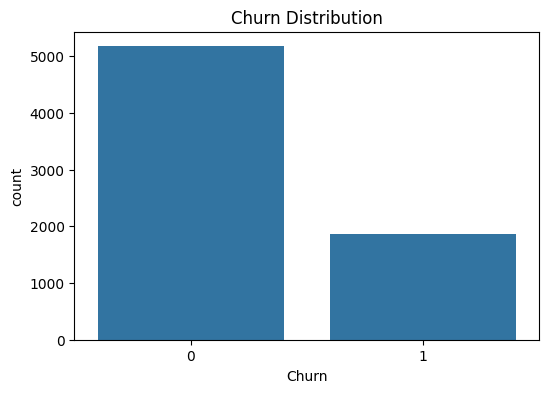

In [22]:
# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

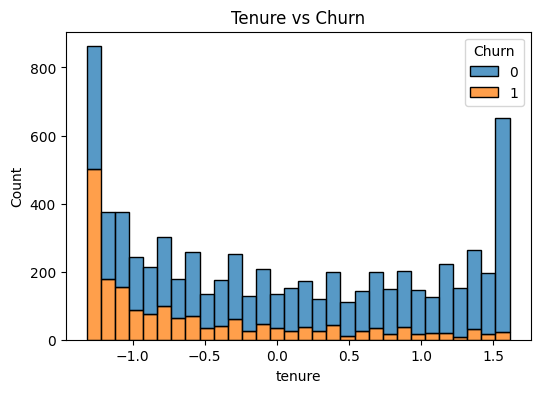

In [23]:
# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure vs Churn')
plt.show()

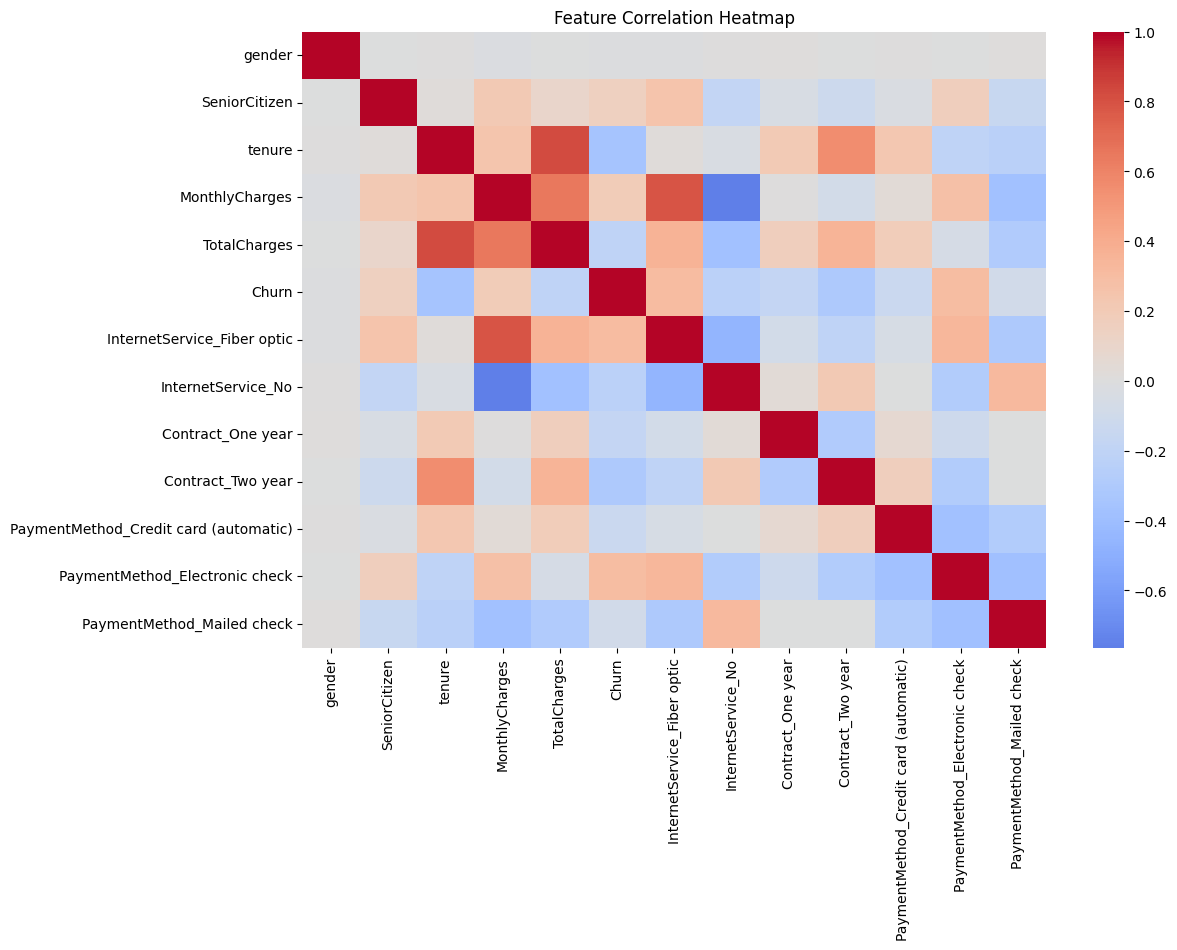

In [24]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

## Step-6: Model Building

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)

## Step-7: Model Evaluation

In [27]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
y_prob = model.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7927608232789212

Confusion Matrix:
 [[924 112]
 [180 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC-AUC Score: 0.8242156365480761


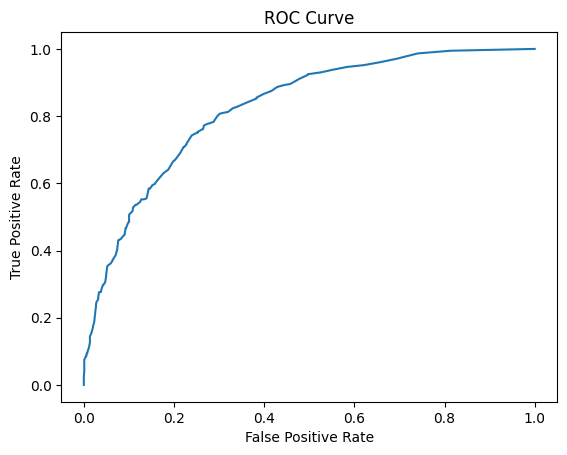

In [28]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Step-8: Saving Model (Model Serialization)

In [29]:
joblib.dump(model, 'churn_prediction_model.pkl')
print('Model saved successfully as churn_prediction_model.pkl')

Model saved successfully as churn_prediction_model.pkl


## Step-9: Loading the saved model

In [30]:
loaded_model = joblib.load('churn_prediction_model.pkl')

### Taking a new customer data

In [31]:
new_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 845.5
}

# Converting to DataFrame
input_df = pd.DataFrame([new_data])

# Applying same preprocessing
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender']:
    input_df[col] = le.fit_transform(input_df[col])

# OneHot encoding similar to training set
input_df = pd.get_dummies(input_df)
input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

# Scaling numeric columns
input_df[num_cols] = scaler.transform(input_df[num_cols])

## Step-10: Making Prediction

In [32]:
prediction = loaded_model.predict(input_df)[0]

if prediction == 1:
    print("⚠️ The customer is likely to CHURN.")
else:
    print("✅ The customer is likely to STAY.")

⚠️ The customer is likely to CHURN.
